# Project 3:
**Binary Classification**

Logistic Regression, Sigmoid, Cross Entropy, and the Geometry of the Decision Boundary
This project continues the progression from Project 1 and Project 2.

 - Project 1 introduced the learning loop using a single feature.
 - Project 2 expanded the model to multiple features and introduced the dot product and matrix view.
 - Project 3 now introduces classification. The structure of the model stays almost the same. The only new ingredient is the sigmoid function and a new loss function called binary cross entropy.

The goal of this project is to show that logistic regression is simply linear regression passed through a nonlinear squashing function. The learning loop is the same. The gradients simplify beautifully. The geometry becomes a separating line or plane. The entire model can be written cleanly in matrix form.

## The Model

In regression, the model was:
**y_hat = w dot x + b**

For classification, the model becomes:

**z = w dot x + b**
**y_hat = sigmoid(z)**

The sigmoid function maps any real number to a value between 0 and 1. This allows the model to output a probability.

**sigmoid(z) = 1 / (1 + exp(-z))**

The linear part is identical to regression. The only difference is that the output is passed through a nonlinear function.

## Geometry of the Decision Boundary

The decision boundary is the set of points where the model is exactly undecided.
This happens when:

w dot x + b = 0

In two dimensions this is a line.
 - In three dimensions this is a plane.
 - In higher dimensions this is a hyperplane.

The weight vector w is perpendicular to the decision boundary.

 - The bias term b shifts the boundary.
 
This geometry is identical to the plane in Project 2. The only difference is that instead of predicting a continuous value, we interpret the output as a probability and classify based on a threshold.


## The Objective Function
**Binary Cross Entropy**

Mean squared error is not appropriate for probabilities.
 - The correct loss for binary classification is binary cross entropy.

For a single example:

J = - [ y log(y_hat) + (1 - y) log(1 - y_hat) ]

This loss comes from maximum likelihood.
 - It heavily penalizes confident wrong predictions.
 - It is the correct language for probability models.

For a dataset of n examples:

J = - (1/n) * sum( y log(y_hat) + (1 - y) log(1 - y_hat) )


## Gradients in Matrix Form

Let:
- X is the feature matrix of shape (n, d)
- w is the weight vector of shape (d, 1)
- b is a scalar
- y is the target vector of shape (n, 1)

Forward pass:
- z = X w + b
- y_hat = sigmoid(z)

Loss:
- J = - (1/n) * sum( y log(y_hat) + (1 - y) log(1 - y_hat) )

The gradient of the loss with respect to z is:
- dL_dz = y_hat - y

This is the key simplification. The derivative of cross entropy combined with sigmoid collapses into a single term.

Gradients:
- dw = (1/n) * X^T (y_hat - y)
- db = (1/n) * sum(y_hat - y)

These gradients look almost identical to the gradients from linear regression.
The only difference is that the error term is y_hat - y instead of (y_pred - y).

## Gradient Descent Update

- w = w - lr * dw
- b = b - lr * db

This is the same learning loop as Projects 1 and 2.


## Example Dataset
We will create a simple binary classification dataset with two features so that the geometry is easy to visualize.

## Implementation
Matrix Based Logistic Regression with Cross Entropy


import numpy as np
import matplotlib.pyplot as plt

# Simple binary classification dataset
# Two features, one binary label
X = np.array([
    [1.2, 3.1],
    [2.0, 2.7],
    [2.5, 2.9],
    [3.0, 3.2],
    [3.2, 4.0],
    [4.0, 4.5],
    [4.5, 5.0],
    [5.0, 5.2]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

n, d = X.shape


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simple binary classification dataset
# Two features, one binary label
X = np.array([
    [1.2, 3.1],
    [2.0, 2.7],
    [2.5, 2.9],
    [3.0, 3.2],
    [3.2, 4.0],
    [4.0, 4.5],
    [4.5, 5.0],
    [5.0, 5.2]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

n, d = X.shape


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [3]:
def forward(X, w, b):
    z = X @ w + b
    y_hat = sigmoid(z)
    return y_hat

In [4]:
def binary_cross_entropy(y, y_hat):
    eps = 1e-10  # avoid log(0)
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

In [5]:
# Initialize parameters
w = np.zeros((d, 1))
b = 0.0
lr = 0.1
epochs = 2000

loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_hat = forward(X, w, b)
    
    # Compute loss
    loss = binary_cross_entropy(y, y_hat)
    loss_history.append(loss)
    
    # Gradients
    error = y_hat - y
    dw = (1/n) * (X.T @ error)
    db = (1/n) * np.sum(error)
    
    # Update
    w -= lr * dw
    b -= lr * db


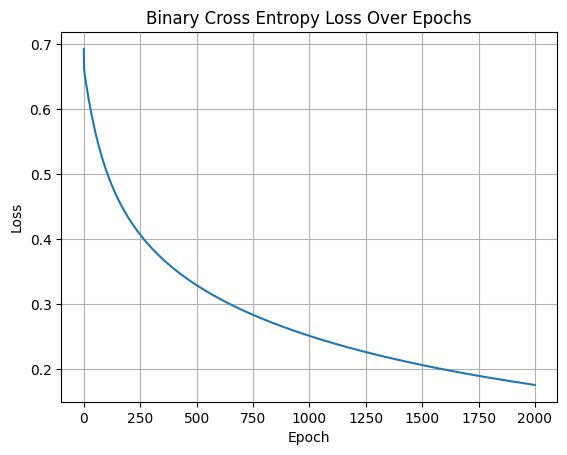

In [6]:
#Plot Loss Curve

plt.plot(loss_history)
plt.title("Binary Cross Entropy Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


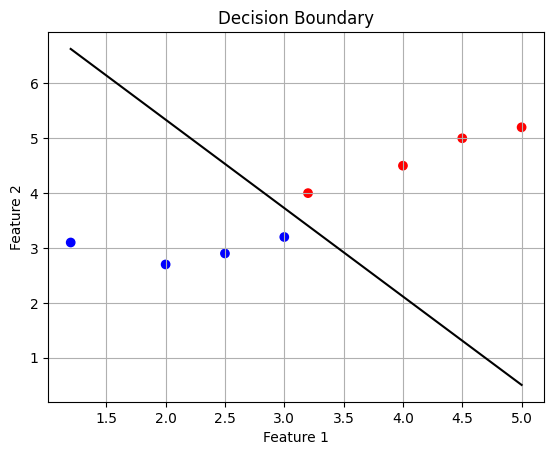

In [7]:
#Decision Boundary Visualization (2D)

plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')

# Decision boundary: w1*x1 + w2*x2 + b = 0
x1_vals = np.linspace(min(X[:,0]), max(X[:,0]), 100)
x2_vals = -(w[0]*x1_vals + b) / w[1]

plt.plot(x1_vals, x2_vals, color='black')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



# Key Insights

- Logistic regression is linear regression passed through a sigmoid.
- The decision boundary is a line or plane defined by w dot x + b = 0.
- Binary cross entropy is the correct loss for probability models.
- The gradient simplifies to y_hat minus y.
- The entire model can be written cleanly in matrix form.
- Logistic regression is a single neuron.

This project sets up Project 4, where linear models fail on XOR and hidden layers become necessary.
